<a href="https://colab.research.google.com/github/Ximenaloranca/Investigaci-n-de-operaciones/blob/main/PERT/CPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ruta crítica para el desarrollo de una página web**

PERT (Program Evaluation and Review Technique) y CPM (Critical Path Method) son dos herramientas fundamentales en la gestión de proyectos para planificar, coordinar y controlar las actividades. Ambas se centran en identificar la ruta crítica, que es la secuencia de actividades que determina la duración mínima de un proyecto.

Se muestra el contenido con las actividades, la duracion y su descripción 💓

In [88]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Definimos las actividades que se tienen que hacer para crear una página web
actividades = {
    "A": {"duracion": 2, "descripcion": "Definir objetivos"},
    "B": {"duracion": 3, "descripcion": "Análisis de requerimientos"},
    "C": {"duracion": 4, "descripcion": "Diseño dr estructura"},
    "D": {"duracion": 5, "descripcion": "Diseño gráfico"},
    "E": {"duracion": 4, "descripcion": "Configurar servidor"},
    "F": {"duracion": 6, "descripcion": "Back end"},
    "G": {"duracion": 6, "descripcion": "Front end"},
    "H": {"duracion": 5, "descripcion": "Base de datos"},
    "I": {"duracion": 4, "descripcion": "Integración"},
    "J": {"duracion": 5, "descripcion": "Pruebas funcionales"},
    "K": {"duracion": 3, "descripcion": "Optimización SEO"},
    "L": {"duracion": 3, "descripcion": "Seguridad/SSL"},
    "M": {"duracion": 4, "descripcion": "Pruebas de usuario"},
    "N": {"duracion": 2, "descripcion": "Lanzamiento"},
}
df = pd.DataFrame.from_dict(actividades, orient="index")

# Ordenar por la duración de las actividades
df_sorted = df.sort_values(by="duracion", ascending=False)

# Imprime la tabla ordenada
print(df_sorted)

   duracion                 descripcion
F         6                    Back end
G         6                   Front end
H         5               Base de datos
J         5         Pruebas funcionales
D         5              Diseño gráfico
C         4        Diseño dr estructura
M         4          Pruebas de usuario
I         4                 Integración
E         4         Configurar servidor
B         3  Análisis de requerimientos
L         3               Seguridad/SSL
K         3            Optimización SEO
A         2           Definir objetivos
N         2                 Lanzamiento


En esta parte se crean la lista de las dependencias de las actividades.

In [89]:
# Definimos las dependencias de las actividades que deben de terminar antes de que empiecen otras actividades

dependencias = [
    ("Inicio", "A"),
    ("A", "B"),
    ("B", "C"),
    ("C", "D"), ("C", "F"), ("C", "G"),
    ("B", "H"), ("E", "F"),
    ("F", "I"), ("G", "I"), ("H", "I"),
    ("I", "J"),
    ("J", "K"), ("J", "L"),
    ("K", "M"), ("L", "M"),
    ("M", "N"),
    ("N", "Fin")
]

In [90]:

# Creamos el la red dirigida
G = nx.DiGraph()
G.add_edges_from(dependencias)

In [91]:

# Agregamos las posiciones de los nodos manualmente para que se vean bonitas

pos = {
    "Inicio": (5, 11),
    "A": (5, 10),
    "B": (5, 9),
    "C": (5, 8),
    "D": (3, 7), "F": (5, 7), "G": (7, 7),
    "H": (9, 7), "E": (1, 7),
    "I": (5, 6),
    "J": (5, 5),
    "K": (3, 4), "L": (7, 4),
    "M": (5, 3),
    "N": (5, 2),
    "Fin": (5, 1)
}

Finalmente, hacemos la imagen de todos los nodos con sus actividades y marcamos de otro color la ruta critica

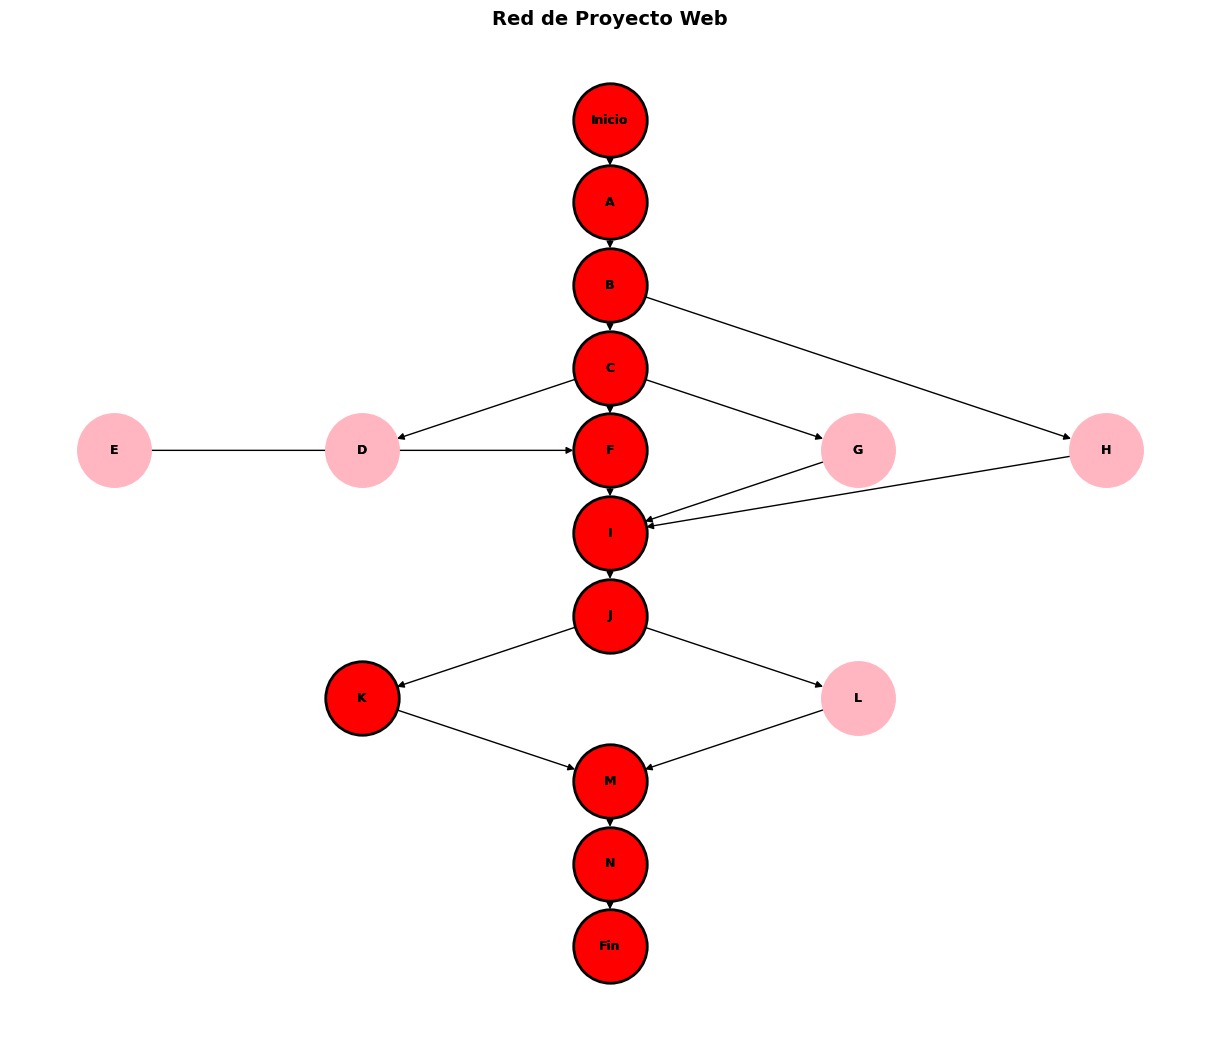

In [92]:
# Dibujamos la red
plt.figure(figsize=(12,10))
nx.draw(G, pos, with_labels=True, node_size=2800, node_color="lightpink",
        font_size=9, font_weight="bold", arrows=True)

# Etiquetamos los nodos solo con su número y marcamos la ruta critica
labels = {node: str(node) for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=9, font_weight="bold")
critical_path = nx.algorithms.dag.dag_longest_path(G, weight="duracion")
critical_nodes = set(critical_path)
nx.draw_networkx_nodes(G, pos, nodelist=critical_nodes,
                       node_size=2800, node_color='red',
                       edgecolors='black', linewidths=2)

plt.title("Red de Proyecto Web", fontsize=14, fontweight="bold")
plt.show()

In [94]:

# Calculamos la ruta crítica
durations = {n: actividades[n]["duracion"] for n in actividades}
critical_path = nx.algorithms.dag.dag_longest_path(G, weight="duracion")
critical_duration = sum(durations.get(n,0) for n in critical_path)

print("Ruta crítica:", " -> ".join(critical_path))
print("Duración total del proyecto:", critical_duration, "días")

Ruta crítica: Inicio -> A -> B -> C -> F -> I -> J -> K -> M -> N -> Fin
Duración total del proyecto: 33 días


Podemos ver que el uso de PERT/CPM proporciona una visión clara y estructurada de las tareas, sus dependencias y los tiempos de ejecución de las mismas. Estos métodos permiten identificar la ruta crítica, que es esencial para asegurar que el proyecto se complete dentro del plazo establecido, sin retrasos innecesarios.